In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
Weather = pd.read_csv('Data assignment 1/Weather 2022.csv', delimiter=',')

In [6]:
Weather.head()


,ts,Observed maximum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_max_past1h/06197 | 406464,Observed minimum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_min_past1h/06193 | 406608,Observed mean humidity past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/humidity_past1h/06180 | 798221,Observed mean humidity past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/humidity_past1h/06193 | 406576,Observed maximum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_max_past1h/06193 | 406592,Observed accumulated precipitation the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/precip_past1h/06197 | 406528,Observed mean wind speed the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_speed_past1h/06197 | 406512,Observed mean intensity of global radiation in the latest hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/radia_glob_past1h/06193 | 406672,Observed mean intensity of global radiation in the latest hour at Kbenhavn Toldbod - DMI station 06187 | 9F7J/MH/QX/DMI/metObs/radia_glob_past1h/06187 | 406688,...,Observed mean wind speed the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/wind_speed_past1h/06193 | 406640,Observed accumulated precipitation the past hour at DMI - DMI station 06184 | 9FJP/PH/86/DMI/metObs/precip_past1h/06184 | 406800,Observed mean wind direction the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_dir_past1h/06197 | 406496,Observed accumulated precipitation the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/precip_past1h/06193 | 406656,Observed mean wind speed the past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/wind_speed_past1h/06180 | 798253,Observed accumulated precipitation the past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/precip_past1h/06180 | 798269,Observed mean wind direction the past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/wind_dir_past1h/06180 | 798237,Observed mean intensity of global radiation in the latest hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/radia_glob_past1h/06197 | 406544,Observed mean wind direction the past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/wind_dir_past1h/06193 | 406624,Observed mean temperature past hour at Copenhagens Airport - DMI station 06180 | 9F7J/JJ/7V/DMI/metObs/temp_mean_past1h/06180 | 798205
0,2022-01-01 00:00:00,7.3,5.5,NaN,100.0,5.7,0.0,6.9,1.0,0.0,...,8.2,0.0,267.0,0.0,NaN,NaN,NaN,0.0,258.0,NaN
1,2022-01-01 01:00:00,7.3,5.4,NaN,100.0,5.7,0.0,5.6,1.0,0.0,...,9.3,0.0,253.0,0.0,NaN,NaN,NaN,0.0,252.0,NaN
2,2022-01-01 02:00:00,7.0,5.1,NaN,100.0,5.9,0.0,6.6,1.0,0.0,...,9.3,0.0,264.0,0.0,NaN,NaN,NaN,0.0,252.0,NaN
3,2022-01-01 03:00:00,6.9,5.3,NaN,100.0,5.6,0.0,5.9,1.0,0.0,...,8.5,0.0,270.0,0.0,NaN,NaN,NaN,0.0,259.0,NaN
4,2022-01-01 04:00:00,7.2,5.2,NaN,100.0,5.5,0.0,5.4,1.0,0.0,...,7.1,0.0,288.0,0.0,NaN,NaN,NaN,0.0,258.0,NaN


In [7]:
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 30 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   ts                                                                                                                                                               8650 non-null   object 
 1   Observed maximum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_max_past1h/06197 | 406464                                         8457 non-null   float64
 2   Observed minimum temperature past hour at Hammer Odde Fyr - DMI station 06193 | 9F7P/7Q/XC/DMI/metObs/temp_min_past1h/06193 | 40

In [8]:
# Filter columns that contain 'Nex' in their column names
nex_columns = [col for col in Weather.columns if 'Nex' in col]

# Include 'ts' column in the list of columns to keep
columns_to_keep = ['ts'] + nex_columns

# Create a new DataFrame with only the columns you want to keep
Weather = Weather[columns_to_keep]

In [9]:
replace_names = {'Observed maximum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_max_past1h/06197 | 406464': 'Maximum temperature', 
                 'Observed accumulated precipitation the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/precip_past1h/06197 | 406528': 'Accumulated percipitation',
                 'Observed mean wind speed the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_speed_past1h/06197 | 406512': 'Mean wind speed',
                 'Observed minimum temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_min_past1h/06197 | 406480': 'Minimum temperature',
                 'Observed mean temperature past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/temp_mean_past1h/06197 | 406432': 'Mean temperature', 
                 'Observed mean humidity past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/humidity_past1h/06197 | 406448': 'Mean humidity',
                 'Observed mean wind direction the past hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/wind_dir_past1h/06197 | 406496': 'Mean wind direction',
                 'Observed mean intensity of global radiation in the latest hour at Nex - DMI station 06197 | 9F7Q/33/4W/DMI/metObs/radia_glob_past1h/06197 | 406544': 'Mean intensity global radiation'
}

In [10]:
 #Rename columns using the replace_names dictionary
Weather = Weather.rename(columns=replace_names)

In [11]:
Weather.isna().sum()

ts                                   0
Maximum temperature                193
Accumulated percipitation          198
Mean wind speed                    201
Minimum temperature                254
Mean temperature                   248
Mean humidity                      186
Mean wind direction                205
Mean intensity global radiation    207
dtype: int64

In [12]:
missing_values = pd.DataFrame

In [13]:
Weather[Weather.isna().any(axis=1)]

,ts,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
118,2022-01-05 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,2022-01-20 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,2022-01-27 09:00:00,NaN,0.3,NaN,NaN,NaN,97.0,NaN,NaN
638,2022-01-27 15:00:00,5.7,NaN,12.8,5.1,5.4,NaN,254.0,34.0
639,2022-01-27 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8555,2022-12-28 01:00:00,4.2,0.0,5.6,NaN,NaN,90.0,243.0,0.0
8579,2022-12-29 01:00:00,6.4,1.1,8.0,NaN,NaN,97.0,202.0,0.0
8603,2022-12-30 01:00:00,7.0,0.6,8.2,NaN,NaN,90.0,228.0,0.0
8627,2022-12-31 01:00:00,6.5,0.4,12.2,NaN,NaN,95.0,202.0,0.0


In [14]:
for column in Weather.columns:
        for i in range(1, len(Weather) - 1):  # Avoid the first and last rows
            if pd.isna(Weather.loc[i, column]):
                # Get the values from the row above and below
                above = Weather.loc[i-1, column]
                below = Weather.loc[i+1, column]
                avg = np.nanmean([above, below])
                
                # Fill the missing value with the computed average
                Weather.loc[i, column] = avg

In [15]:
# Check for duplicates. If any, these have to be removed
Weather.duplicated().sum()

0

In [16]:
Weather['datetime'] = pd.to_datetime(Weather['ts'])
# Set the 'datetime' column as the index of the DataFrame. 
Weather.set_index('datetime', inplace=True)

In [17]:
Weather

,ts,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
datetime,,,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,7.3,0.0,6.9,7.0,7.2,99.0,267.0,0.0
2022-01-01 01:00:00,2022-01-01 01:00:00,7.3,0.0,5.6,6.6,6.8,99.0,253.0,0.0
2022-01-01 02:00:00,2022-01-01 02:00:00,7.0,0.0,6.6,6.6,6.8,99.0,264.0,0.0
2022-01-01 03:00:00,2022-01-01 03:00:00,6.9,0.0,5.9,6.5,6.7,98.0,270.0,0.0
2022-01-01 04:00:00,2022-01-01 04:00:00,7.2,0.0,5.4,6.5,6.8,98.0,288.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,10.4,0.0,9.8,9.8,10.1,93.0,221.0,0.0
2022-12-31 20:00:00,2022-12-31 20:00:00,10.6,0.0,8.5,9.9,10.2,94.0,227.0,0.0
2022-12-31 21:00:00,2022-12-31 21:00:00,10.6,0.3,8.6,9.7,10.1,96.0,223.0,0.0


In [18]:
Weather.drop(columns=['ts'], inplace=True)

In [19]:
Weather.tail()

,Maximum temperature,Accumulated percipitation,Mean wind speed,Minimum temperature,Mean temperature,Mean humidity,Mean wind direction,Mean intensity global radiation
datetime,,,,,,,,
2022-12-31 19:00:00,10.4,0.0,9.8,9.8,10.1,93.0,221.0,0.0
2022-12-31 20:00:00,10.6,0.0,8.5,9.9,10.2,94.0,227.0,0.0
2022-12-31 21:00:00,10.6,0.3,8.6,9.7,10.1,96.0,223.0,0.0
2022-12-31 22:00:00,9.9,0.5,7.9,9.6,9.8,98.0,233.0,0.0
2022-12-31 23:00:00,9.9,0.1,6.9,9.2,9.5,98.0,228.0,0.0


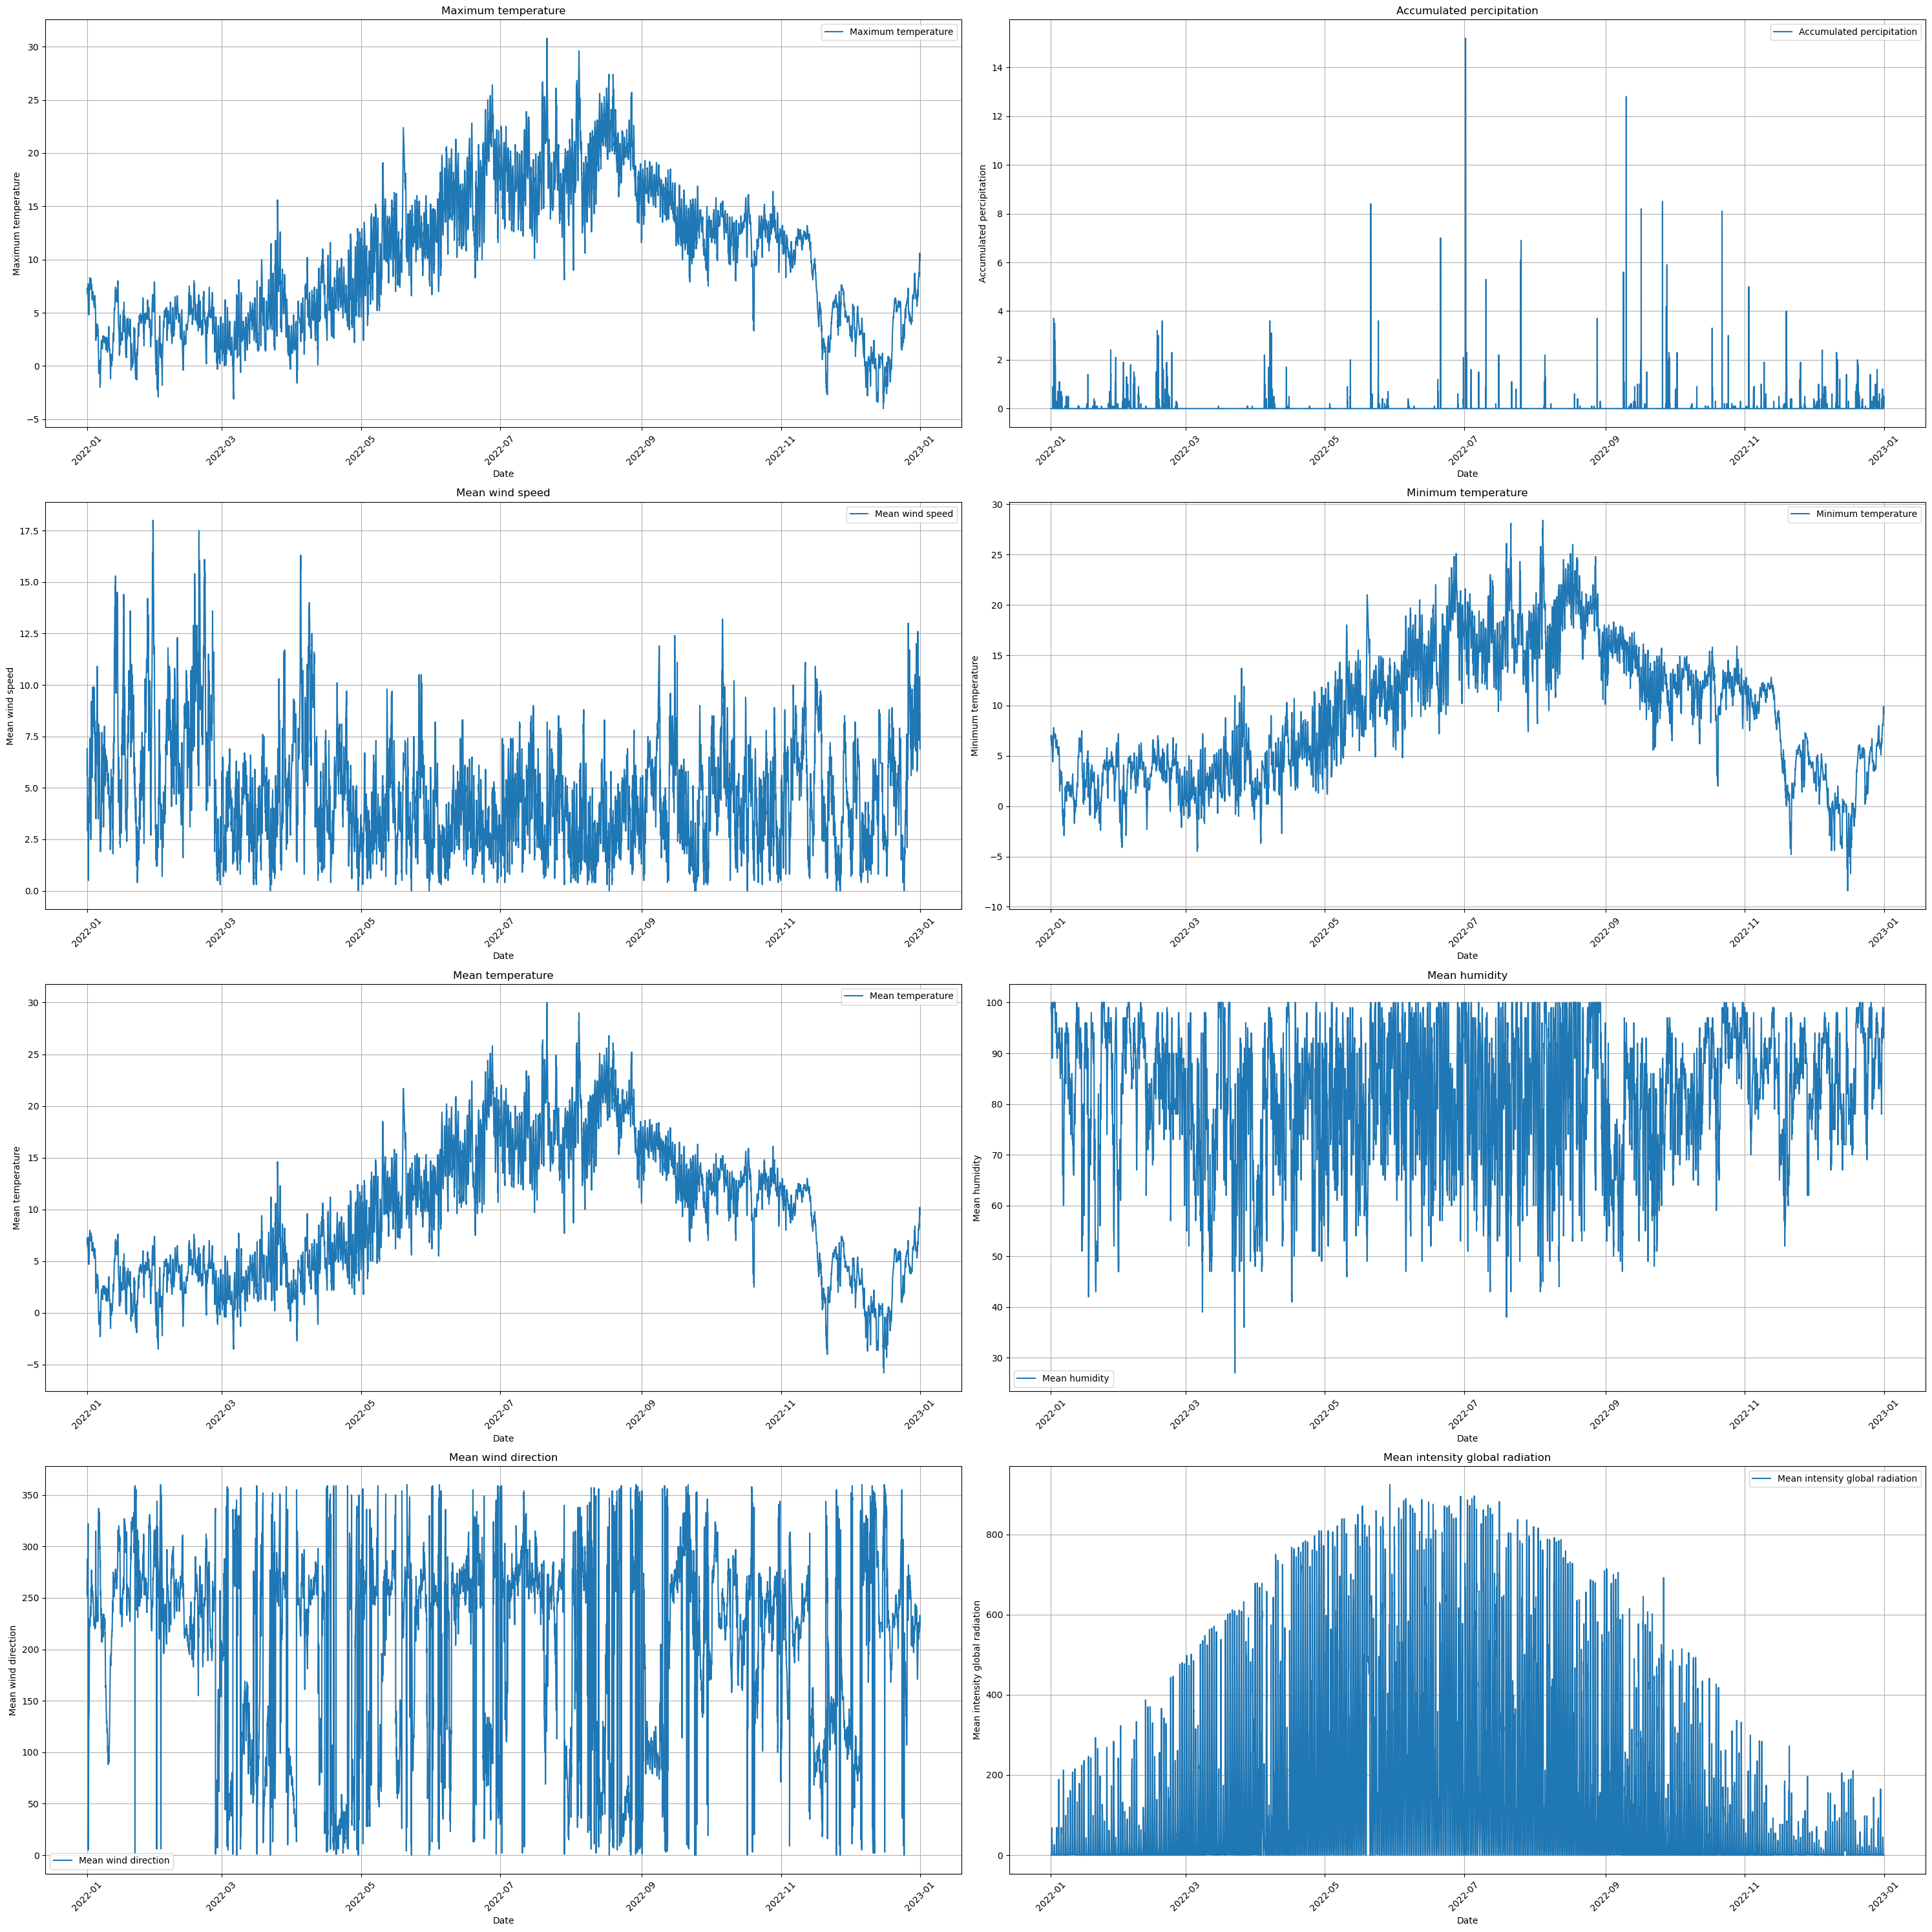

In [20]:
# Create a figure with subplots arranged in 3 rows and 2 columns. 
# figsize sets the overall figure size to be larger to improve visibility
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 30))  
# Flatten the axes array into a 1D array for easier iteration
axes = axes.flatten()

for i, column in enumerate(Weather):
    axes[i].plot(Weather.index, Weather[column], label=column)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend()
    axes[i].grid()
# Rotate the xlabels for clarity
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [21]:
Weather.to_csv('Data assignment 1/Weather data.csv', index=True)  